In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import descartes as des
from shapely.geometry import Point, Polygon
import geopandas as gpd

import missingno as msn


In [2]:
# Read in map
shapefile = 'ne_50m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADMIN', 'ISO_A2', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Zimbabwe,ZW,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,ZM,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,YE,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,VN,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,VE,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


We want the countries from the chernair dataset. 

In [3]:
air = pd.read_csv('processed_chernair.csv')

In [4]:
air.head()

,Unnamed: 0,country,Code,city,longitude,latitude,Date,endsampling,duration,i131,cs134,cs137
0,0,SE,1,RISOE,12.07,55.7,1986-04-27,0,24.0,1.00000,0.00000,0.24000
1,1,SE,1,RISOE,12.07,55.7,1986-04-28,0,24.0,0.00460,0.00054,0.00098
2,2,SE,1,RISOE,12.07,55.7,1986-04-29,12,12.0,0.01470,0.00430,0.00740
3,3,SE,1,RISOE,12.07,55.7,1986-04-29,0,12.0,0.00061,0.00000,0.00009
4,4,SE,1,RISOE,12.07,55.7,1986-04-30,0,24.0,0.00075,0.00010,0.00028


In [5]:
gdf.head()

,country,country_code,geometry
0,Zimbabwe,ZW,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,ZM,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,YE,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,VN,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,VE,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


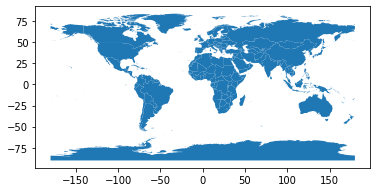

In [6]:
gdf.plot()

In [7]:
air_countries = set(air.country)
map_countries = set(gdf.country_code)

In [8]:
# F -> france, No -> Norway, and of course, UK -> the United Kingdom
air_countries - air_countries.intersection(map_countries)

{'F', 'NO', 'UK'}

In [9]:
# Search for the string resembling it in the map data set
# Set the air country variables to match those variables 
# Perform the subsetting 

In [10]:
gdf[gdf['country'].str.match('^F.*') == True] ## One does wonder why they would set up -99 here.

,country,country_code,geometry
9,Federated States of Micronesia,FM,"MULTIPOLYGON (((162.98320 5.32573, 162.99346 5..."
22,Falkland Islands,FK,"MULTIPOLYGON (((-58.85020 -51.26992, -58.69751..."
160,France,-99,"MULTIPOLYGON (((9.48037 42.80542, 9.45420 42.6..."
165,French Polynesia,PF,"MULTIPOLYGON (((-151.46660 -16.65752, -151.484..."
167,French Southern and Antarctic Lands,TF,"MULTIPOLYGON (((69.18486 -49.10957, 69.26514 -..."
169,Finland,FI,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65..."
170,Fiji,FJ,"MULTIPOLYGON (((179.99922 -16.16855, 179.84824..."
182,Faroe Islands,FO,"MULTIPOLYGON (((-6.62319 61.80596, -6.64277 61..."


In [11]:
gdf.loc[gdf['country'] == 'France', 'country_code'] = 'FR'

In [12]:
gdf[gdf['country'].str.match('^F.*') == True]

,country,country_code,geometry
9,Federated States of Micronesia,FM,"MULTIPOLYGON (((162.98320 5.32573, 162.99346 5..."
22,Falkland Islands,FK,"MULTIPOLYGON (((-58.85020 -51.26992, -58.69751..."
160,France,FR,"MULTIPOLYGON (((9.48037 42.80542, 9.45420 42.6..."
165,French Polynesia,PF,"MULTIPOLYGON (((-151.46660 -16.65752, -151.484..."
167,French Southern and Antarctic Lands,TF,"MULTIPOLYGON (((69.18486 -49.10957, 69.26514 -..."
169,Finland,FI,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65..."
170,Fiji,FJ,"MULTIPOLYGON (((179.99922 -16.16855, 179.84824..."
182,Faroe Islands,FO,"MULTIPOLYGON (((-6.62319 61.80596, -6.64277 61..."


In [13]:
gdf[gdf['country'].str.match('^N.*') == True]

,country,country_code,geometry
11,Northern Mariana Islands,MP,"MULTIPOLYGON (((145.70840 18.76250, 145.67813 ..."
88,Norway,-99,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69..."
89,North Korea,KP,"MULTIPOLYGON (((128.37461 38.62344, 128.33945 ..."
90,Nigeria,NG,"MULTIPOLYGON (((7.30078 4.41816, 7.20391 4.387..."
91,Niger,NE,"POLYGON ((13.60635 13.70459, 13.42695 13.70176..."
92,Nicaragua,NI,"POLYGON ((-83.15752 14.99307, -83.18535 14.956..."
93,New Zealand,NZ,"MULTIPOLYGON (((173.11533 -41.27930, 173.23086..."
94,Niue,NU,"POLYGON ((-169.80342 -19.08301, -169.90381 -19..."
96,Netherlands,NL,"MULTIPOLYGON (((5.99395 50.75044, 5.89246 50.7..."
99,Nepal,NP,"POLYGON ((88.10977 27.87061, 88.15029 27.84331..."


In [14]:
gdf.loc[gdf['country'] == 'Norway', 'country_code'] = 'NO'

In [15]:
gdf[gdf['country'].str.match('^N.*') == True]

,country,country_code,geometry
11,Northern Mariana Islands,MP,"MULTIPOLYGON (((145.70840 18.76250, 145.67813 ..."
88,Norway,NO,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69..."
89,North Korea,KP,"MULTIPOLYGON (((128.37461 38.62344, 128.33945 ..."
90,Nigeria,NG,"MULTIPOLYGON (((7.30078 4.41816, 7.20391 4.387..."
91,Niger,NE,"POLYGON ((13.60635 13.70459, 13.42695 13.70176..."
92,Nicaragua,NI,"POLYGON ((-83.15752 14.99307, -83.18535 14.956..."
93,New Zealand,NZ,"MULTIPOLYGON (((173.11533 -41.27930, 173.23086..."
94,Niue,NU,"POLYGON ((-169.80342 -19.08301, -169.90381 -19..."
96,Netherlands,NL,"MULTIPOLYGON (((5.99395 50.75044, 5.89246 50.7..."
99,Nepal,NP,"POLYGON ((88.10977 27.87061, 88.15029 27.84331..."


In [16]:
gdf[gdf['country'].str.match('^U.*') == True]

,country,country_code,geometry
7,Uzbekistan,UZ,"MULTIPOLYGON (((70.94678 42.24868, 70.97900 42..."
8,Uruguay,UY,"POLYGON ((-53.37061 -33.74219, -53.41958 -33.7..."
12,United States Virgin Islands,VI,"MULTIPOLYGON (((-64.84502 18.33008, -64.91997 ..."
16,United States of America,US,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576..."
31,United Kingdom,GB,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51..."
32,United Arab Emirates,AE,"MULTIPOLYGON (((56.29785 25.65068, 56.36348 25..."
33,Ukraine,UA,"MULTIPOLYGON (((38.21436 47.09146, 38.17832 47..."
34,Uganda,UG,"POLYGON ((33.90322 -1.00205, 33.79404 -1.00205..."
43,United Republic of Tanzania,TZ,"MULTIPOLYGON (((39.49648 -6.17461, 39.57305 -6..."


In [17]:
air_countries

{'AU',
 'BE',
 'CH',
 'CZ',
 'DE',
 'ES',
 'F',
 'FI',
 'GR',
 'HU',
 'IR',
 'IT',
 'NL',
 'NO',
 'SE',
 'UK'}

Change the chernobyl data to match the country codes from the map. 

In [18]:
air.loc[air['country'] == 'F', 'country'] = 'FR'
air.loc[air['country'] == 'FR']

,Unnamed: 0,country,Code,city,longitude,latitude,Date,endsampling,duration,i131,cs134,cs137
277,277,FR,3,CADARACHE,5.75,43.71,1986-05-01,9,24.0,0.300000,0.0008,0.020000
278,278,FR,3,CADARACHE,5.75,43.71,1986-05-02,9,24.0,6.299999,0.1800,0.410000
279,279,FR,3,CADARACHE,5.75,43.71,1986-05-03,9,24.0,5.900000,0.4000,0.940000
280,280,FR,3,CADARACHE,5.75,43.71,1986-05-04,9,24.0,6.599999,0.5000,1.099999
281,281,FR,3,CADARACHE,5.75,43.71,1986-05-05,9,24.0,1.400000,0.1000,0.310000
...,...,...,...,...,...,...,...,...,...,...,...,...
532,532,FR,3,VERDUN,5.38,49.15,1986-05-06,9,24.0,0.110000,0.0630,0.120000
533,533,FR,3,VERDUN,5.38,49.15,1986-05-07,9,24.0,0.039000,0.0140,0.028000
534,534,FR,3,VERDUN,5.38,49.15,1986-05-08,9,24.0,0.008700,0.0012,0.002000
535,535,FR,3,VERDUN,5.38,49.15,1986-05-09,9,24.0,0.009100,0.0012,0.002100


In [19]:
air.loc[air['country'] == 'UK', 'country'] = 'GB'
air.loc[air['country'] == 'GB']

,Unnamed: 0,country,Code,city,longitude,latitude,Date,endsampling,duration,i131,cs134,cs137
1044,1044,GB,9,BERKELEY,-2.45,51.69,1986-04-30,10,29.45,0.00010,0.0000,0.00
1045,1045,GB,9,BERKELEY,-2.45,51.69,1986-05-01,8,21.50,NaN,0.0004,0.00
1046,1046,GB,9,BERKELEY,-2.45,51.69,1986-05-02,15,31.05,0.07000,0.0160,0.03
1047,1047,GB,9,BERKELEY,-2.45,51.69,1986-05-02,20,4.20,1.10000,0.2600,0.48
1048,1048,GB,9,BERKELEY,-2.45,51.69,1986-05-02,21,1.20,2.10000,0.3600,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...
1158,1158,GB,9,HARWELL,-1.30,51.62,1986-05-08,9,12.13,0.00540,0.0007,NaN
1159,1159,GB,9,HARWELL,-1.30,51.62,1986-05-08,11,1.44,0.00640,0.0000,NaN
1160,1160,GB,9,HARWELL,-1.30,51.62,1986-05-08,14,2.53,0.00500,0.0000,NaN
1161,1161,GB,9,HARWELL,-1.30,51.62,1986-05-09,9,19.03,0.00570,0.0010,NaN


If we redo the subsetting, we should get a complete match. Yeah. 

In [20]:
air_countries = set(air.country)
map_countries = set(gdf.country_code)

In [21]:
air_countries.difference(map_countries)

set()

In [22]:
gdf.loc[gdf['country_code'] == 'FR']

,country,country_code,geometry
160,France,FR,"MULTIPOLYGON (((9.48037 42.80542, 9.45420 42.6..."


In [23]:
indices_europe = []
for index in range(len(gdf)):
    if gdf.country_code.values[index] in air_countries:
        indices_europe.append(index)

In [24]:
indices_europe

[31, 47, 48, 54, 88, 96, 137, 142, 146, 154, 156, 160, 169, 184, 217, 225]

In [25]:
gdf_europe = gdf.iloc[indices_europe]

In [26]:
map_codes = set(gdf_europe.country_code)
air_codes = set(air.country)

In [27]:
air_codes.difference(map_codes)

set()

In [28]:
len(air_codes) - len(map_codes)

0

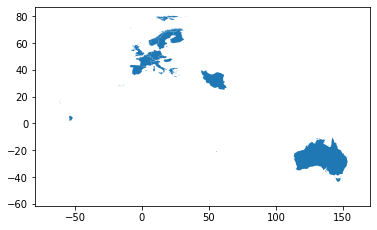

In [29]:
gdf_europe.plot()

In [30]:
air_codes

{'AU',
 'BE',
 'CH',
 'CZ',
 'DE',
 'ES',
 'FI',
 'FR',
 'GB',
 'GR',
 'HU',
 'IR',
 'IT',
 'NL',
 'NO',
 'SE'}

In [31]:
air.head()

,Unnamed: 0,country,Code,city,longitude,latitude,Date,endsampling,duration,i131,cs134,cs137
0,0,SE,1,RISOE,12.07,55.7,1986-04-27,0,24.0,1.00000,0.00000,0.24000
1,1,SE,1,RISOE,12.07,55.7,1986-04-28,0,24.0,0.00460,0.00054,0.00098
2,2,SE,1,RISOE,12.07,55.7,1986-04-29,12,12.0,0.01470,0.00430,0.00740
3,3,SE,1,RISOE,12.07,55.7,1986-04-29,0,12.0,0.00061,0.00000,0.00009
4,4,SE,1,RISOE,12.07,55.7,1986-04-30,0,24.0,0.00075,0.00010,0.00028


In [32]:
geo_air = gpd.GeoDataFrame(air)

In [33]:
crs =  'epsg:4326'
geometry = [Point(xy) for xy in zip( air["longitude"], air["latitude"]  )] 

In [37]:
geo_air = gpd.GeoDataFrame(air, crs = crs, geometry = geometry)

In [38]:
geo_air.head()

,Unnamed: 0,country,Code,city,longitude,latitude,Date,endsampling,duration,i131,cs134,cs137,geometry
0,0,SE,1,RISOE,12.07,55.7,1986-04-27,0,24.0,1.00000,0.00000,0.24000,POINT (12.07000 55.70000)
1,1,SE,1,RISOE,12.07,55.7,1986-04-28,0,24.0,0.00460,0.00054,0.00098,POINT (12.07000 55.70000)
2,2,SE,1,RISOE,12.07,55.7,1986-04-29,12,12.0,0.01470,0.00430,0.00740,POINT (12.07000 55.70000)
3,3,SE,1,RISOE,12.07,55.7,1986-04-29,0,12.0,0.00061,0.00000,0.00009,POINT (12.07000 55.70000)
4,4,SE,1,RISOE,12.07,55.7,1986-04-30,0,24.0,0.00075,0.00010,0.00028,POINT (12.07000 55.70000)


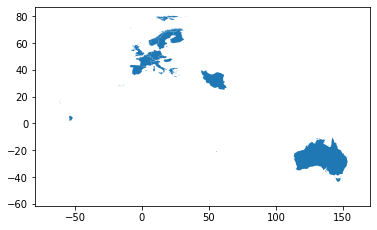

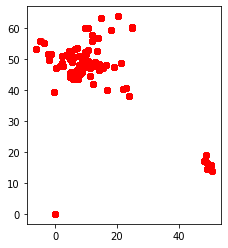

In [39]:
gdf_europe.plot()
geo_air.plot(color = 'r')

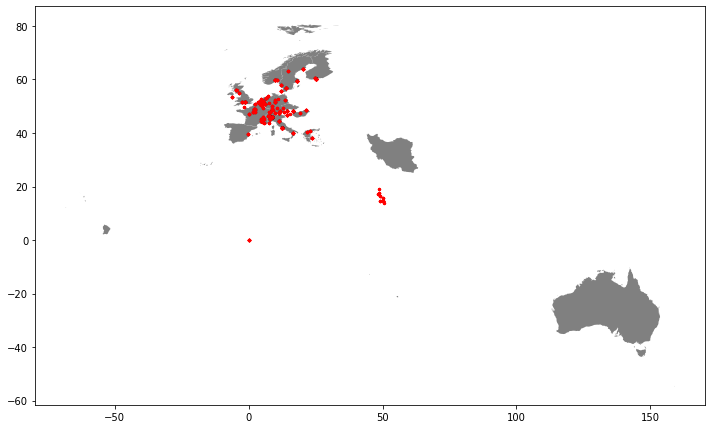

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf_europe.plot(ax = ax, color = 'gray')
geo_air.plot(ax = ax, markersize = 5, color = 'r', alpha = 0.5)
## And what are those markers out there? 

In [41]:
geo_air.country.isnull().sum()

0

In [42]:
# I have a theory those ocean plots are australia.
# But going just to the nift of it -> Look for all coordinates whose latitude value is below 20. 

In [43]:
se_point = geo_air.geometry.values[0]

In [44]:
se_point.xy[1][0]

55.7

## Section on outlier points from the plot

In [45]:
# iterate through all points 
index_counter = 0
index_list = []
for point in geo_air.geometry.values:
    # Less than a 20 latitude 
    if point.xy[1][0] < 22:
        index_list.append(index_counter)
    index_counter += 1
    
        


In [46]:
geo_air.iloc[index_list].geometry

1253      POINT (0.00000 0.00000)
1254      POINT (0.00000 0.00000)
1255      POINT (0.00000 0.00000)
1256      POINT (0.00000 0.00000)
1257      POINT (0.00000 0.00000)
                  ...            
2033    POINT (50.68000 14.00000)
2034    POINT (50.68000 14.00000)
2035    POINT (50.68000 14.00000)
2036    POINT (50.68000 14.00000)
2037    POINT (50.68000 14.00000)
Name: geometry, Length: 141, dtype: geometry

In [47]:
weird_points = geo_air.iloc[index_list]

In [48]:
weird_points.city.unique()

array(['VALENCIA', 'VAERNES', 'BANSKA', 'BRATISLAVA', 'CESKE', 'HRADEC',
       'JASLOVSKE', 'MORAVSKY', 'PRAHA', 'USTI'], dtype=object)

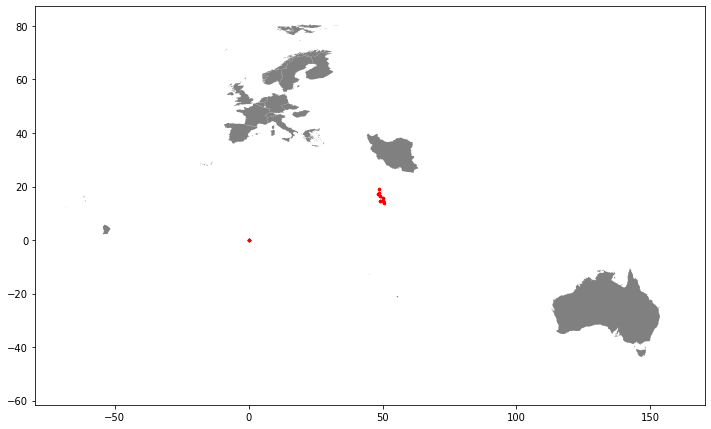

In [49]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf_europe.plot(ax = ax, color = 'gray')
weird_points.plot(ax = ax, markersize = 5, color = 'r', alpha = 0.5)
## And what are those markers out there? 

### Reset lats and longs for these observations

In [50]:
world_cities = 'SimpleMapsWorldCities/worldcities.csv'

In [51]:
world_cities = pd.read_csv(world_cities)

In [52]:
world_cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [53]:
cities_reset = weird_points.city.unique()

In [54]:
indices_cities = []
for index in range(len(world_cities)):
    if world_cities.city.values[index].upper() in cities_reset:
        indices_cities.append(index)

In [55]:
world_cities.iloc[indices_cities]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
238,Valencia,Valencia,10.230,-67.980,Venezuela,VE,VEN,Carabobo,admin,1770000.0,1862309871
532,Bratislava,Bratislava,48.150,17.117,Slovakia,SK,SVK,Bratislavský,primary,423737.0,1703195001
750,Valencia,Valencia,39.485,-0.400,Spain,ES,ESP,Valencia,admin,808000.0,1724981666


In [56]:
world_cities.city.values[0].upper()

'TOKYO'

In [57]:
cities_reset

array(['VALENCIA', 'VAERNES', 'BANSKA', 'BRATISLAVA', 'CESKE', 'HRADEC',
       'JASLOVSKE', 'MORAVSKY', 'PRAHA', 'USTI'], dtype=object)

In [58]:
str('valencia').upper()

'VALENCIA'

In [59]:
world_cities.iso2

0        JP
1        US
2        MX
3        IN
4        BR
         ..
15488    GL
15489    UA
15490    RU
15491    RU
15492    CA
Name: iso2, Length: 15493, dtype: object

In [60]:
geo_low_points = geo_air.iloc[index_list]

In [61]:
geo_low_points

,Unnamed: 0,country,Code,city,longitude,latitude,Date,endsampling,duration,i131,cs134,cs137,geometry
1253,1253,ES,11,VALENCIA,0.00,0.0,1986-05-01,0,24.0,0.000,0.0000,0.0470,POINT (0.00000 0.00000)
1254,1254,ES,11,VALENCIA,0.00,0.0,1986-05-02,0,24.0,0.000,0.0054,0.0351,POINT (0.00000 0.00000)
1255,1255,ES,11,VALENCIA,0.00,0.0,1986-05-03,0,24.0,0.000,0.0410,0.0995,POINT (0.00000 0.00000)
1256,1256,ES,11,VALENCIA,0.00,0.0,1986-05-04,0,24.0,0.000,0.0000,0.1082,POINT (0.00000 0.00000)
1257,1257,ES,11,VALENCIA,0.00,0.0,1986-05-05,0,24.0,0.000,0.0000,NaN,POINT (0.00000 0.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,2033,CZ,23,USTI,50.68,14.0,1986-05-01,5,24.0,5.240,1.4000,NaN,POINT (50.68000 14.00000)
2034,2034,CZ,23,USTI,50.68,14.0,1986-05-02,5,24.0,4.810,1.4300,NaN,POINT (50.68000 14.00000)
2035,2035,CZ,23,USTI,50.68,14.0,1986-05-03,5,24.0,0.196,0.0130,NaN,POINT (50.68000 14.00000)
2036,2036,CZ,23,USTI,50.68,14.0,1986-05-04,5,24.0,1.300,0.5020,NaN,POINT (50.68000 14.00000)


In [62]:
geo_low_points['country'].groupby([geo_low_points['city']]).count()

city
BANSKA         6
BRATISLAVA    10
CESKE         12
HRADEC        11
JASLOVSKE     11
MORAVSKY      13
PRAHA         39
USTI           5
VAERNES        8
VALENCIA      26
Name: country, dtype: int64

In [63]:
geo_low_points['country'].groupby([geo_low_points['city']]).describe()

,count,unique,top,freq
city,,,,
BANSKA,6,1,CZ,6
BRATISLAVA,10,1,CZ,10
CESKE,12,1,CZ,12
HRADEC,11,1,CZ,11
JASLOVSKE,11,1,CZ,11
MORAVSKY,13,1,CZ,13
PRAHA,39,1,CZ,39
USTI,5,1,CZ,5
VAERNES,8,1,NO,8


In [64]:
# First coordinate will be long
lats_longs = {'VAERNES': (10.327740, 59.199860), 'VALENCIA': (-0.376288,39.469906),
             'BANSKA': (13.632010, 50.500030), 'BRATISLAVA': (15.257400, 50.539560), 
             'CESKE': (14.475020, 48.973910), 'HRADEC': (15.832630, 50.209430), 
             'JASLOVSKE': (14.420460, 50.087810), 'MORAVSKY': (16.312850, 49.048970), 
             'PRAHA': (14.420460, 50.087811)}

In [65]:
lats_longs

{'BANSKA': (13.63201, 50.50003),
 'BRATISLAVA': (15.2574, 50.53956),
 'CESKE': (14.47502, 48.97391),
 'HRADEC': (15.83263, 50.20943),
 'JASLOVSKE': (14.42046, 50.08781),
 'MORAVSKY': (16.31285, 49.04897),
 'PRAHA': (14.42046, 50.087811),
 'VAERNES': (10.32774, 59.19986),
 'VALENCIA': (-0.376288, 39.469906)}

In [66]:
geo_low_points.loc[geo_low_points.city == 'VAERNES', 'latitude']

1716    0.0
1717    0.0
1718    0.0
1719    0.0
1720    0.0
1721    0.0
1722    0.0
1723    0.0
Name: latitude, dtype: float64

In [67]:
geo_low_points.loc[geo_low_points.city == 'VAERNES', 'latitude'] = 59.199860

/Users/Leonard/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [68]:
geo_low_points.loc[geo_low_points.city == 'VAERNES', 'longitude'] = 10.327740

/Users/Leonard/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [69]:
geo_low_points.loc[geo_low_points.city == 'VAERNES']

,Unnamed: 0,country,Code,city,longitude,latitude,Date,endsampling,duration,i131,cs134,cs137,geometry
1716,1716,NO,21,VAERNES,10.32774,59.19986,1986-04-28,18,9.0,7.00,0.0,2.0000,POINT (0.00000 0.00000)
1717,1717,NO,21,VAERNES,10.32774,59.19986,1986-04-29,9,15.0,9.00,0.0,3.0000,POINT (0.00000 0.00000)
1718,1718,NO,21,VAERNES,10.32774,59.19986,1986-04-30,9,24.0,5.00,0.0,2.0000,POINT (0.00000 0.00000)
1719,1719,NO,21,VAERNES,10.32774,59.19986,1986-05-02,9,48.0,0.30,0.0,0.1100,POINT (0.00000 0.00000)
1720,1720,NO,21,VAERNES,10.32774,59.19986,1986-05-05,9,72.0,0.08,0.0,0.0011,POINT (0.00000 0.00000)
1721,1721,NO,21,VAERNES,10.32774,59.19986,1986-05-07,9,48.0,0.20,0.0,0.0400,POINT (0.00000 0.00000)
1722,1722,NO,21,VAERNES,10.32774,59.19986,1986-05-09,9,48.0,0.10,0.0,0.0250,POINT (0.00000 0.00000)
1723,1723,NO,21,VAERNES,10.32774,59.19986,1986-05-12,9,72.0,0.01,0.0,0.0015,POINT (0.00000 0.00000)


In [70]:
len(geo_low_points.loc[geo_low_points.country == 'ES'])

26

In [71]:
geo_low_points.loc[geo_low_points.city == 'VALENCIA', 'longitude'] = -0.376288 
geo_low_points.loc[geo_low_points.city == 'VALENCIA', 'latitude'] = 39.469906

/Users/Leonard/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [72]:
geo_low_points.loc[geo_low_points.city == 'VALENCIA']

,Unnamed: 0,country,Code,city,longitude,latitude,Date,endsampling,duration,i131,cs134,cs137,geometry
1253,1253,ES,11,VALENCIA,-0.376288,39.469906,1986-05-01,0,24.0,0.0,0.0000,0.0470,POINT (0.00000 0.00000)
1254,1254,ES,11,VALENCIA,-0.376288,39.469906,1986-05-02,0,24.0,0.0,0.0054,0.0351,POINT (0.00000 0.00000)
1255,1255,ES,11,VALENCIA,-0.376288,39.469906,1986-05-03,0,24.0,0.0,0.0410,0.0995,POINT (0.00000 0.00000)
1256,1256,ES,11,VALENCIA,-0.376288,39.469906,1986-05-04,0,24.0,0.0,0.0000,0.1082,POINT (0.00000 0.00000)
1257,1257,ES,11,VALENCIA,-0.376288,39.469906,1986-05-05,0,24.0,0.0,0.0000,NaN,POINT (0.00000 0.00000)
1258,1258,ES,11,VALENCIA,-0.376288,39.469906,1986-05-06,0,24.0,0.0,0.0254,0.0663,POINT (0.00000 0.00000)
1259,1259,ES,11,VALENCIA,-0.376288,39.469906,1986-05-07,0,24.0,0.0,0.0000,NaN,POINT (0.00000 0.00000)
1260,1260,ES,11,VALENCIA,-0.376288,39.469906,1986-05-08,0,24.0,0.0,0.0000,NaN,POINT (0.00000 0.00000)
1261,1261,ES,11,VALENCIA,-0.376288,39.469906,1986-05-09,0,24.0,0.0,0.0000,NaN,POINT (0.00000 0.00000)
1262,1262,ES,11,VALENCIA,-0.376288,39.469906,1986-05-10,0,24.0,0.0,0.0000,NaN,POINT (0.00000 0.00000)


In [73]:
old_lats = geo_low_points.loc[geo_low_points.country == 'CZ'].latitude
geo_low_points.loc[geo_low_points.country == 'CZ', 'latitude'] = geo_low_points.loc[geo_low_points.country == 'CZ'].longitude
geo_low_points.loc[geo_low_points.country == 'CZ', 'longitude'] = old_lats

/Users/Leonard/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [74]:
geo_low_points.loc[geo_low_points.country == 'CZ']

,Unnamed: 0,country,Code,city,longitude,latitude,Date,endsampling,duration,i131,cs134,cs137,geometry
1904,1904,CZ,23,BANSKA,19.17,48.73,1986-05-01,5,24.0,3.150,0.000,NaN,POINT (48.73000 19.17000)
1905,1905,CZ,23,BANSKA,19.17,48.73,1986-05-02,5,24.0,1.240,0.050,NaN,POINT (48.73000 19.17000)
1906,1906,CZ,23,BANSKA,19.17,48.73,1986-05-03,5,24.0,0.763,0.000,NaN,POINT (48.73000 19.17000)
1907,1907,CZ,23,BANSKA,19.17,48.73,1986-05-05,5,24.0,0.367,0.000,NaN,POINT (48.73000 19.17000)
1908,1908,CZ,23,BANSKA,19.17,48.73,1986-05-06,5,24.0,0.535,0.000,NaN,POINT (48.73000 19.17000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,2033,CZ,23,USTI,14.00,50.68,1986-05-01,5,24.0,5.240,1.400,NaN,POINT (50.68000 14.00000)
2034,2034,CZ,23,USTI,14.00,50.68,1986-05-02,5,24.0,4.810,1.430,NaN,POINT (50.68000 14.00000)
2035,2035,CZ,23,USTI,14.00,50.68,1986-05-03,5,24.0,0.196,0.013,NaN,POINT (50.68000 14.00000)
2036,2036,CZ,23,USTI,14.00,50.68,1986-05-04,5,24.0,1.300,0.502,NaN,POINT (50.68000 14.00000)


In [75]:
# Redo the point zipping 
geometry = [Point(xy) for xy in zip( geo_low_points["longitude"], geo_low_points["latitude"]  )] 
geo_low_points.geometry = geometry

/Users/Leonard/miniconda3/lib/python3.6/site-packages/geopandas/geodataframe.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[geo_column_name] = level


In [76]:
geo_low_points

,Unnamed: 0,country,Code,city,longitude,latitude,Date,endsampling,duration,i131,cs134,cs137,geometry
1253,1253,ES,11,VALENCIA,-0.376288,39.469906,1986-05-01,0,24.0,0.000,0.0000,0.0470,POINT (-0.37629 39.46991)
1254,1254,ES,11,VALENCIA,-0.376288,39.469906,1986-05-02,0,24.0,0.000,0.0054,0.0351,POINT (-0.37629 39.46991)
1255,1255,ES,11,VALENCIA,-0.376288,39.469906,1986-05-03,0,24.0,0.000,0.0410,0.0995,POINT (-0.37629 39.46991)
1256,1256,ES,11,VALENCIA,-0.376288,39.469906,1986-05-04,0,24.0,0.000,0.0000,0.1082,POINT (-0.37629 39.46991)
1257,1257,ES,11,VALENCIA,-0.376288,39.469906,1986-05-05,0,24.0,0.000,0.0000,NaN,POINT (-0.37629 39.46991)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,2033,CZ,23,USTI,14.000000,50.680000,1986-05-01,5,24.0,5.240,1.4000,NaN,POINT (14.00000 50.68000)
2034,2034,CZ,23,USTI,14.000000,50.680000,1986-05-02,5,24.0,4.810,1.4300,NaN,POINT (14.00000 50.68000)
2035,2035,CZ,23,USTI,14.000000,50.680000,1986-05-03,5,24.0,0.196,0.0130,NaN,POINT (14.00000 50.68000)
2036,2036,CZ,23,USTI,14.000000,50.680000,1986-05-04,5,24.0,1.300,0.5020,NaN,POINT (14.00000 50.68000)


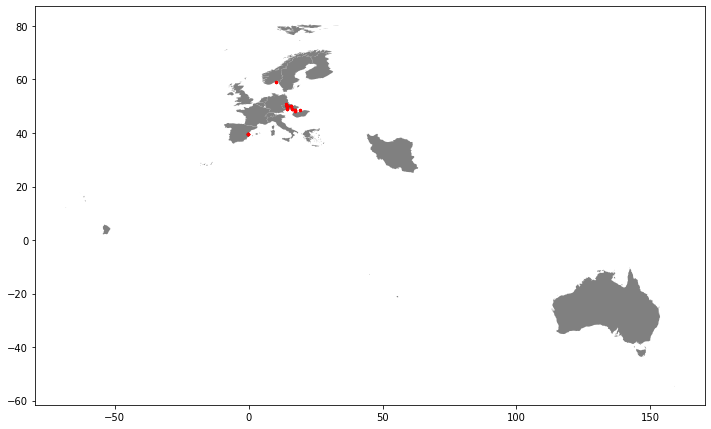

In [345]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf_europe.plot(ax = ax, color = 'gray')
geo_low_points.plot(ax = ax, markersize = 5, color = 'r', alpha = 0.5)

### France specific data

In [181]:
geo_france_air

,Unnamed: 0,country,Code,city,longitude,latitude,Date,endsampling,duration,i131,cs134,cs137,geometry
277,277,FR,3,CADARACHE,5.75,43.71,1986-05-01,9,24.0,0.300000,0.0008,0.020000,POINT (43.71000 5.75000)
278,278,FR,3,CADARACHE,5.75,43.71,1986-05-02,9,24.0,6.299999,0.1800,0.410000,POINT (43.71000 5.75000)
279,279,FR,3,CADARACHE,5.75,43.71,1986-05-03,9,24.0,5.900000,0.4000,0.940000,POINT (43.71000 5.75000)
280,280,FR,3,CADARACHE,5.75,43.71,1986-05-04,9,24.0,6.599999,0.5000,1.099999,POINT (43.71000 5.75000)
281,281,FR,3,CADARACHE,5.75,43.71,1986-05-05,9,24.0,1.400000,0.1000,0.310000,POINT (43.71000 5.75000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,532,FR,3,VERDUN,5.38,49.15,1986-05-06,9,24.0,0.110000,0.0630,0.120000,POINT (49.15000 5.38000)
533,533,FR,3,VERDUN,5.38,49.15,1986-05-07,9,24.0,0.039000,0.0140,0.028000,POINT (49.15000 5.38000)
534,534,FR,3,VERDUN,5.38,49.15,1986-05-08,9,24.0,0.008700,0.0012,0.002000,POINT (49.15000 5.38000)
535,535,FR,3,VERDUN,5.38,49.15,1986-05-09,9,24.0,0.009100,0.0012,0.002100,POINT (49.15000 5.38000)


In [182]:
# Plot the measurements taken from france on a france map. 
geo_france_air = geo_air.loc[geo_air['country'] == 'FR']

In [183]:
geo_france_map = gdf_europe.loc[gdf_europe['country_code'] == 'FR']

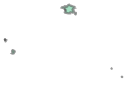

In [184]:
geo_france_map.geometry.values[0]

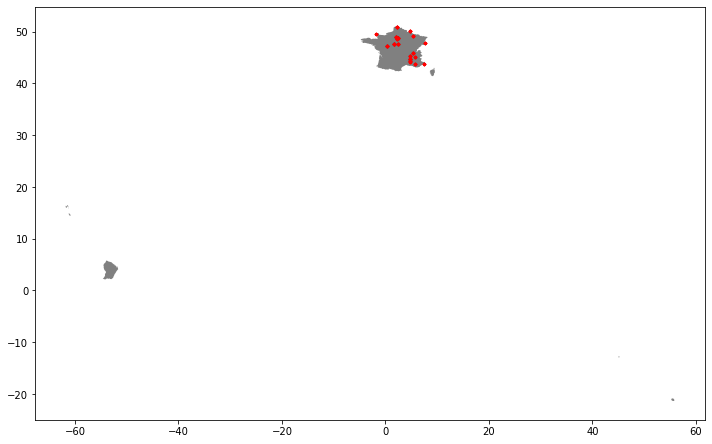

In [188]:
fig, ax = plt.subplots(figsize=(12, 8))
geo_france_map.plot(ax = ax, color = 'gray')
geo_france_air.plot(ax = ax, color = 'r', markersize = 5)

In [143]:
geo_france_map.total_bounds

array([-61.7940918 , -21.36904297,  55.8390625 ,  51.09711914])

In [144]:
geo_france_air.total_bounds

array([43.71, -1.9 , 51.  ,  7.56])

In [157]:
point = geo_france_air.geometry.values[0]

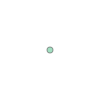

In [158]:
point

In [77]:
gdf_europe.total_bounds

array([-68.37109375, -54.74921875, 158.95888672,  80.47783203])

In [82]:
geo_air.total_bounds

array([ 0.  , -6.28, 63.83, 50.68])

In [80]:
geo_air.total_bounds = gdf_europe.total_bounds

/Users/Leonard/miniconda3/lib/python3.6/site-packages/geopandas/geodataframe.py:97: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)


AttributeError: can't set attribute

In [174]:
geo_air.head()

,Unnamed: 0,country,Code,city,longitude,latitude,Date,endsampling,duration,i131,cs134,cs137,geometry
0,0,SE,1,RISOE,12.07,55.7,1986-04-27,0,24.0,1.00000,0.00000,0.24000,POINT (55.70000 12.07000)
1,1,SE,1,RISOE,12.07,55.7,1986-04-28,0,24.0,0.00460,0.00054,0.00098,POINT (55.70000 12.07000)
2,2,SE,1,RISOE,12.07,55.7,1986-04-29,12,12.0,0.01470,0.00430,0.00740,POINT (55.70000 12.07000)
3,3,SE,1,RISOE,12.07,55.7,1986-04-29,0,12.0,0.00061,0.00000,0.00009,POINT (55.70000 12.07000)
4,4,SE,1,RISOE,12.07,55.7,1986-04-30,0,24.0,0.00075,0.00010,0.00028,POINT (55.70000 12.07000)


In [71]:
gdf_europe.geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
geo_air.geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
# I like these nifty set operations
eu_set = set(europe)

NameError: name 'europe' is not defined

In [ ]:
gdf_set = set(gdf.country.values)

In [32]:
len(eu_set) - len(eu_set.intersection(gdf_set))

NameError: name 'eu_set' is not defined

In [33]:
eu_set.difference(gdf_set)

NameError: name 'eu_set' is not defined

In [34]:
## Subsetting only european countries from the map
gdf_copy = gdf

In [35]:
indices_europe = []
for index in range(len(gdf)):
    if gdf.country.values[index] in europe:
        indices_europe.append(index)

NameError: name 'europe' is not defined

In [36]:
europe_data = gdf.iloc[indices_europe]

/Users/Leonard/miniconda3/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


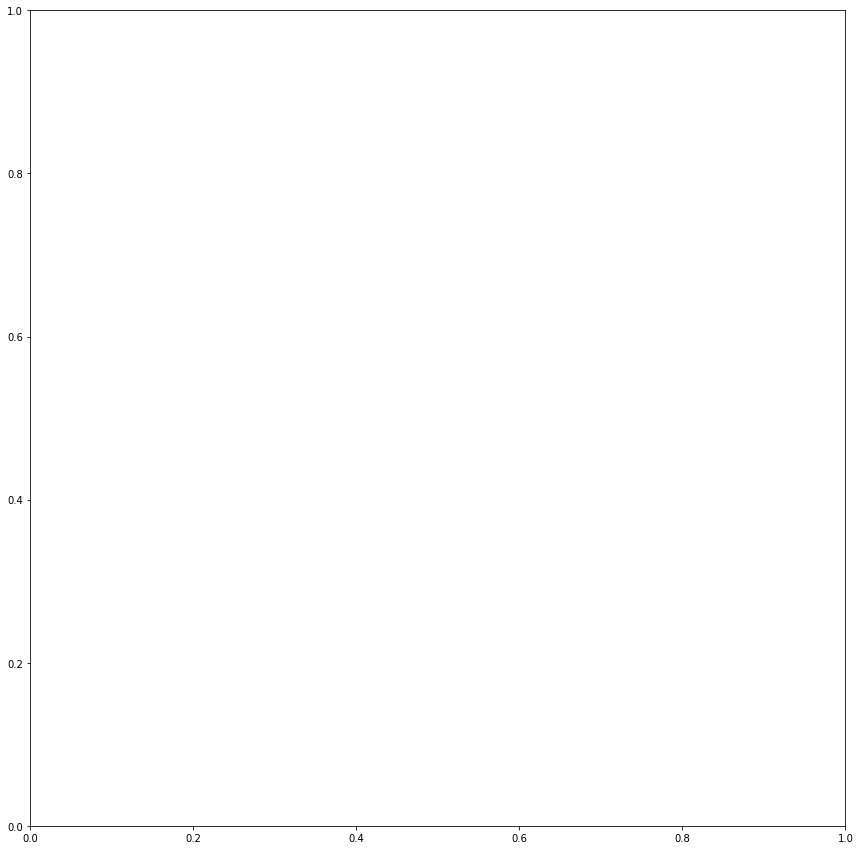

In [37]:
fig, ax = plt.subplots(figsize = (15, 15))
europe_data.plot(ax = ax)
plt.show()

In [38]:
# We know France has foreign territories
france_data = gdf.loc[gdf.country == 'France']

In [39]:
france_data.geometry

160    MULTIPOLYGON (((9.48037 42.80542, 9.45420 42.6...
Name: geometry, dtype: geometry

In [40]:
france = france_data.explode()['geometry'][1] ## Useful to quickly visualise

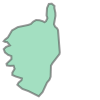

In [173]:
france_data.explode()['geometry'][0]

In [42]:
france_exploded = france_data.explode()

In [43]:
continental_france = pd.DataFrame(france_exploded.iloc[0]) # Should know how to switch series into data frame

In [44]:
boy = france_exploded.iloc[1].to_frame().transpose()

In [45]:
pd.DataFrame({'country': ['France']}, {'geometry': [france_exploded.iloc[1].geometry]})

,country
geometry,France


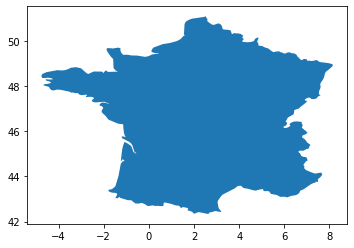

In [46]:
gpd.GeoDataFrame(boy).plot()
plt.show()